In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from matplotlib import cm
import numpy as np
import random
import json
from IPython.display import clear_output
import os

# from result_plots.ProfilingBased.common.common import read_data, get_metric_mapping
# from result_plots.ProfilingBased.common.process_data_from_solver import get_mean_from_iterations, normalize_error_result, get_ensemble_error
# from result_plots.ProfilingBased.common.plot import get_result_from_pkl, get_x_position, get_xtick_position, \
#                                                 plot_raw, get_gain, gain_over_strawman, consolidate_gain_over_strawman

# from result_plots.ProfilingBased.common.heatmap import plot_heatmap

## plotting function

In [2]:
# plot profiling result (mean value) for all metrics with different rows
def plot_result(data, algos = ['cm'], width = 4096, metric = 'card', 
                isSaveFig=False, isShowByte=False, output_dir_name='profiler', legends = ['a', 'b'], 
                x_labels = ['a', 'b'], x_labelname = "number of flows (ratio)"):
    big_fontsize = 22
    small_fontsize = 22

    fig = plt.figure(figsize = (6, 6))

    # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])
    
    marker_list = ['o', '*', 'x', 'v', '^']

    # Creating plot
    for d, label, marker in zip(data, legends, marker_list):
        x = np.arange(0, len(d), 1, dtype=int)
        bp = ax.plot(x, d, label=f'{label}', marker=marker)

    # plt.axvline(x = 8192, color = 'darkgreen', linestyle='--')

    ax.set_xticks(x)
    ax.set_xticklabels(x_labels, fontsize=small_fontsize)
    plt.xlabel(x_labelname, fontsize=small_fontsize)
        
    # ax.set_yscale('log')

    plt.yticks(fontsize=small_fontsize)    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    title_str = ''
    ylabel_str = ''
    ylabel_fontsize = small_fontsize
    if metric == 'hh':
        title_str = f'Heavy Hitter - {int(width/1024)} KB'
        ylabel_str = "Average Relative Error (%)"
    elif metric == 'entropy':
        title_str = f'Entropy - {int(width/1024)} KB'
        ylabel_str = "Relative Error (%)"
    elif metric == 'card':
        title_str = f'Cardinality - {int(width/1024)} KB'
        ylabel_str = "Relative Error (%)"
    elif metric == 'fsd':
        title_str = f'Flow Size Distribution - {int(width/1024)} KB'
        ylabel_str = "Weighted Mean Relative Difference"
        # ylabel_fontsize = 20
    elif metric == 'change_det':
        title_str = f'Change Detection - {int(width/1024)} KB'
        ylabel_str = "Average Relative Error (%)"

    # plt.title(title_str, fontsize=18)
    plt.ylabel(ylabel_str, fontsize=ylabel_fontsize)

    # legend_patch = []
    # legend_patch.append(mpatches.Patch(color='crimson', label='Best algorithms'))
    # legend_patch.append(mpatches.Patch(color='royalblue', label='General algorithm'))
    # plt.legend(handles=legend_patch, fontsize=16)
    plt.legend(fontsize=small_fontsize, frameon=False)

    if isSaveFig:
        output_dir = output_dir_name
        # create directory if it doesn't exist
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        plt.savefig(f'{output_dir}/{metric}-mem-{width}.pdf', format='pdf', bbox_inches='tight')

    # show plot
    plt.show()
        
# plot_result(mean_data)

In [3]:
def create_plot_list(algos, base_dir, directory_list):
    plot_list = []
    # iterate over all sketch algorithms
    for algo in algos:
        ll = []
        for directory in directory_list:
            filename = base_dir + directory + '/' + algo + '_level_1_result.json'
            level = 1
            row = 1
            if algo == 'cm' or algo == 'cs':
                row = 2
            elif algo == 'mrac' or algo == 'mrb':
                filename = base_dir + directory + '/' + algo + '_level_8_result.json'
                level = 8
            elif algo == 'univmon':
                filename = base_dir + directory + '/' + algo + '_level_16_result.json'
                level = 16
                row = 2
            
            # print(f'row: {row}, {algo}')
            # print(filename)
            with open(filename) as f:
                js = json.load(f)        
                ll.append(np.mean(js[metric][f'{row}'][f'{int(width / (level * row))}']))
        plot_list.append(ll)
    return plot_list, level

### Set training set config

In [4]:
# algo_metric_mapping = {}
# algo_metric_mapping['cm'] = ['hh', 'fsd']
# algo_metric_mapping['cs'] = ['hh', 'fsd']
# algo_metric_mapping['hll'] = ['card']
# algo_metric_mapping['ll'] = ['card']
# algo_metric_mapping['lc'] = ['card']
# algo_metric_mapping['mrb'] = ['card']
# algo_metric_mapping['mrac'] = ['fsd']

# metric_algo_mapping = {}
# for algo in algo_metric_mapping:
#     for metric in algo_metric_mapping[algo]:
#         if metric not in metric_algo_mapping:
#             metric_algo_mapping[metric] = [algo]
#         else:
#             metric_algo_mapping[metric].append(algo)

# metric_algo_mapping

In [13]:
width = 4096
# width = 8192
# width = 16384


isSaveFig = False
isShowByte = False

In [6]:
####                       cardinality                         FSD                      HH
loop_unit_algos = [['hll', 'mrb', 'lc', 'll', 'univmon'], ['cm', 'cs', 'mrac', ], ['cm', 'cs', 'univmon', ]]
# loop_unit_algos = [['hll', 'mrb', 'lc', 'll'], ['cm', 'cs', 'mrac', ], ['cm', 'cs', ]]

loop_unit_metric = ['card', 'fsd', 'hh']

---
## number of flows

In [7]:
base_dir = './results/'

# directory_list = ['profiler_zipf_1.1_numberofFlow_0.1x_srcip', 'profiler_zipf_1.1_numberofFlow_1x_srcip', 'profiler_zipf_1.1_numberofFlow_10x_srcip']
directory_list = ['profiler_zipf_1.1_numberofFlow_0.1x_srcip', 'profiler_zipf_1.1_numberofFlow_0.5x_srcip', 'profiler_zipf_1.1_numberofFlow_1x_srcip', 
                  'profiler_zipf_1.1_numberofFlow_2x_srcip', 'profiler_zipf_1.1_numberofFlow_4x_srcip', ]

# x_labels = ['0.1x', '1x', '10x', ]
x_labels = ['0.1x', '0.5x', '1x', '2x', '4x',]
x_labelname = "Number of flows (ratio)"

output_dir_name = 'figures/plot_flow_density/num_of_flow/'

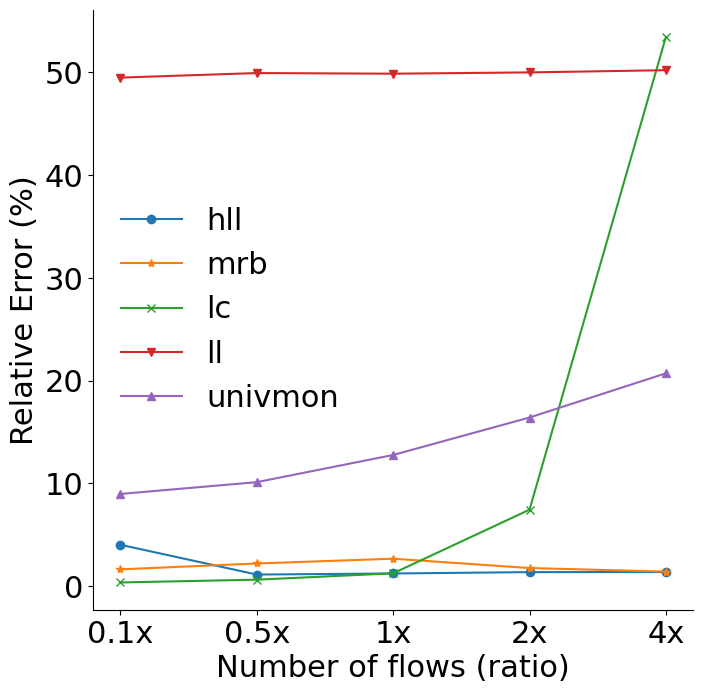

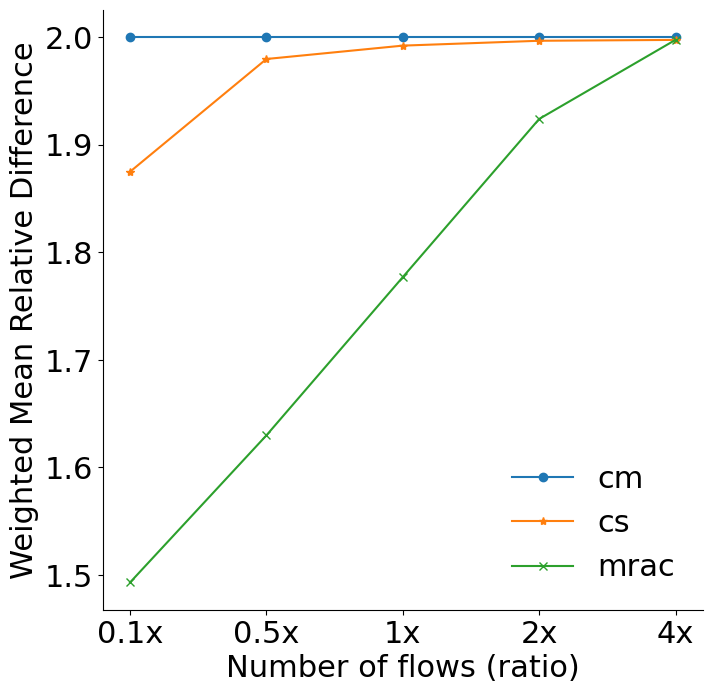

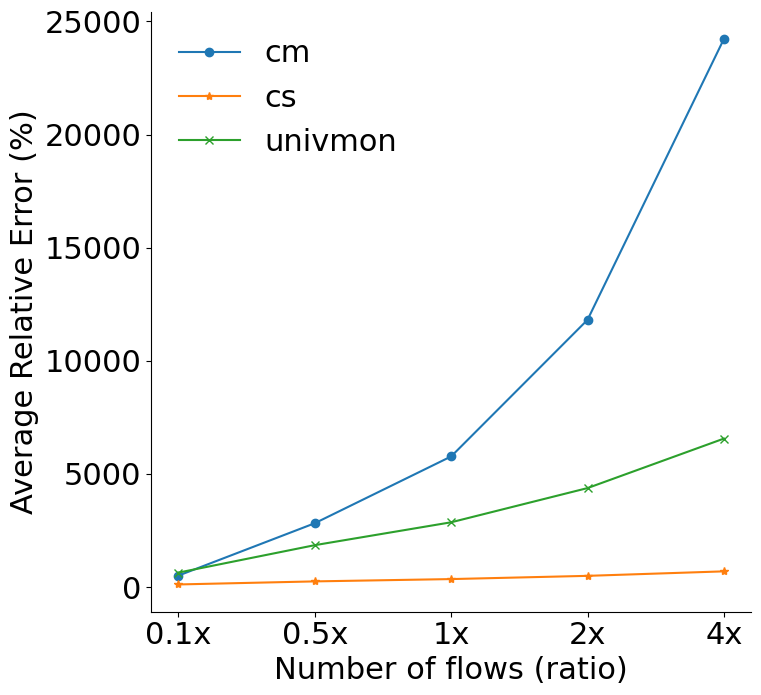

In [8]:
for algos, metric in zip(loop_unit_algos, loop_unit_metric):
    legends = algos
    plot_list, level = create_plot_list(algos, base_dir, directory_list)
    plot_result(plot_list, algos, width, metric, isSaveFig, isShowByte, output_dir_name, legends, x_labels, x_labelname)

---
## number of packets

In [9]:
base_dir = './results/'

directory_list = ['profiler_zipf_1.1_numberofPkt_0.3x_srcip', 'profiler_zipf_1.1_numberofPkt_0.6x_srcip', 'profiler_zipf_1.1_numberofPkt_1x_srcip']

x_labels = ['0.3x', '0.6x', '1x', ]
x_labelname = "Number of packets (ratio)"

output_dir_name = 'figures/plot_flow_density/num_of_packet/'

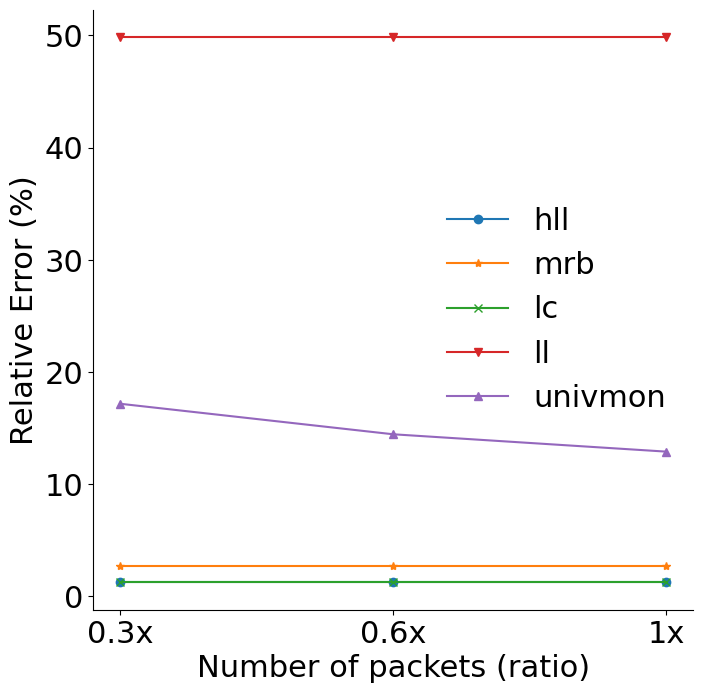

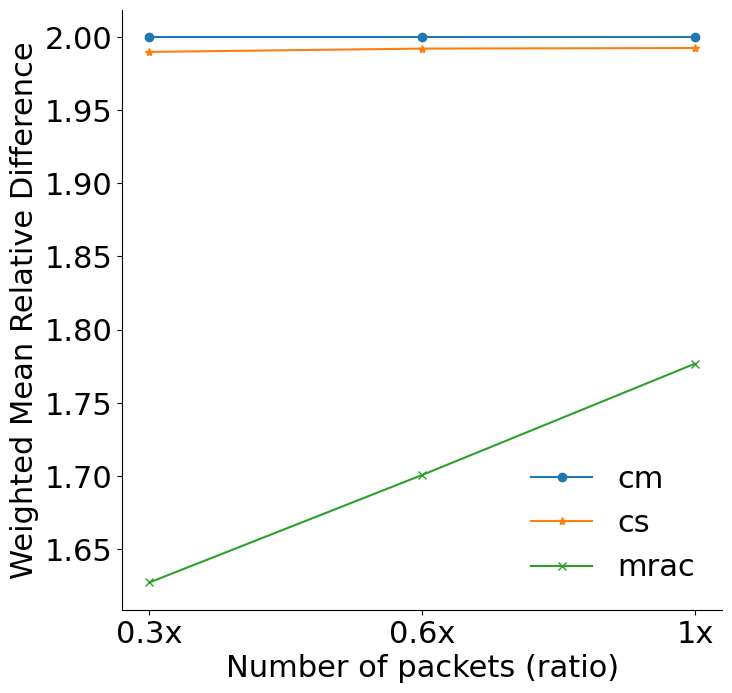

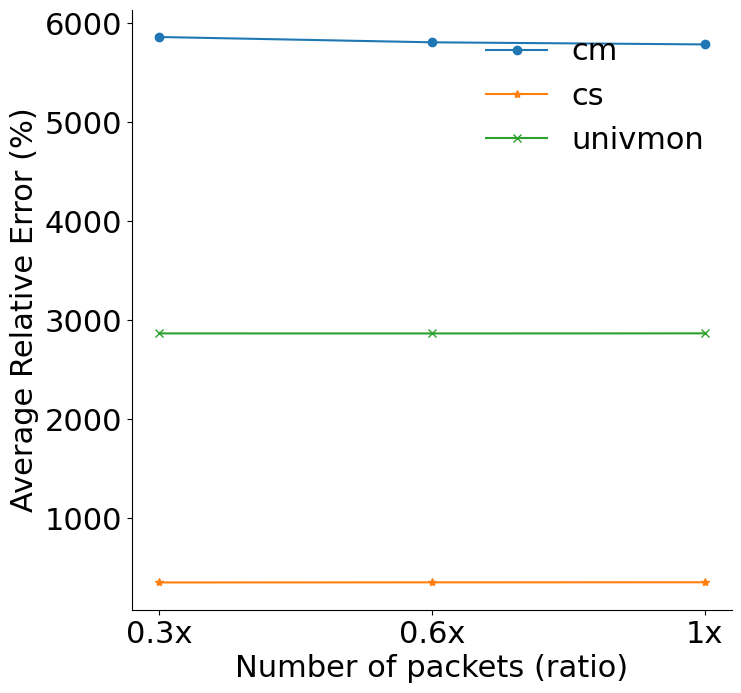

In [10]:
for algos, metric in zip(loop_unit_algos, loop_unit_metric):
    legends = algos
    plot_list, level = create_plot_list(algos, base_dir, directory_list)
    plot_result(plot_list, algos, width, metric, isSaveFig, isShowByte, output_dir_name, legends, x_labels, x_labelname)

---
## Diff distributions

In [11]:
base_dir = './results/'

# directory_list = ['profiler_caida_srcip', 'profiler_uniform_fixFlowPkt_srcip', 'profiler_zipf_1.1_fixFlowPkt_srcip']
directory_list = ['profiler_caida_srcip', 'profiler_zipf_1.1_fixFlowPkt_srcip', 'profiler_uniform_fixFlowPkt_srcip']

# x_labels = ['Caida', 'Uniform', 'Zipf', ]
x_labels = ['Caida', 'Zipf', 'Uniform', ]
x_labelname = "Distributions"

output_dir_name = 'figures/plot_flow_density/distributions/'

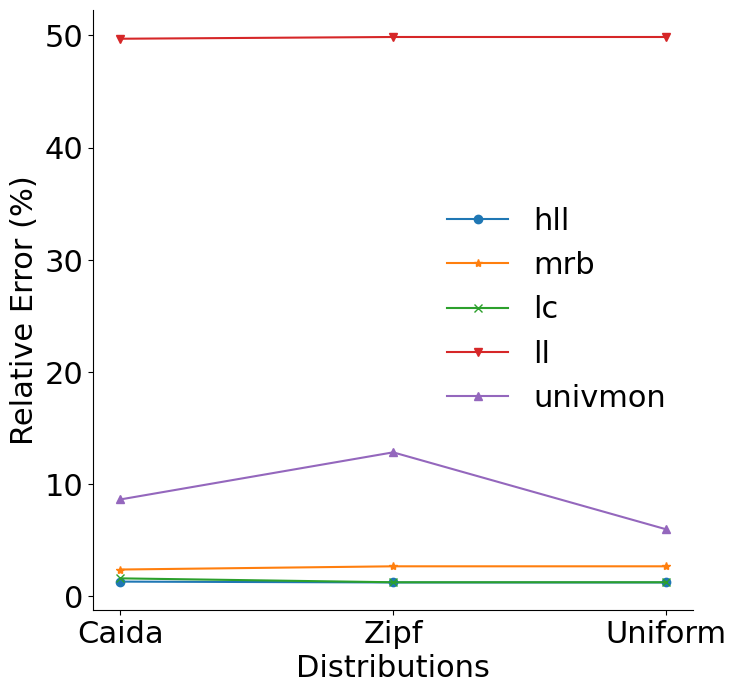

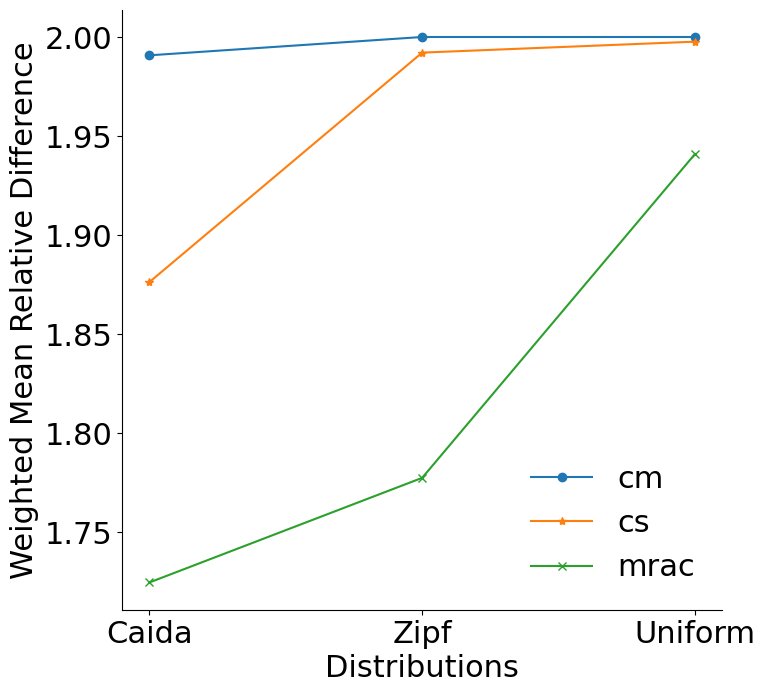

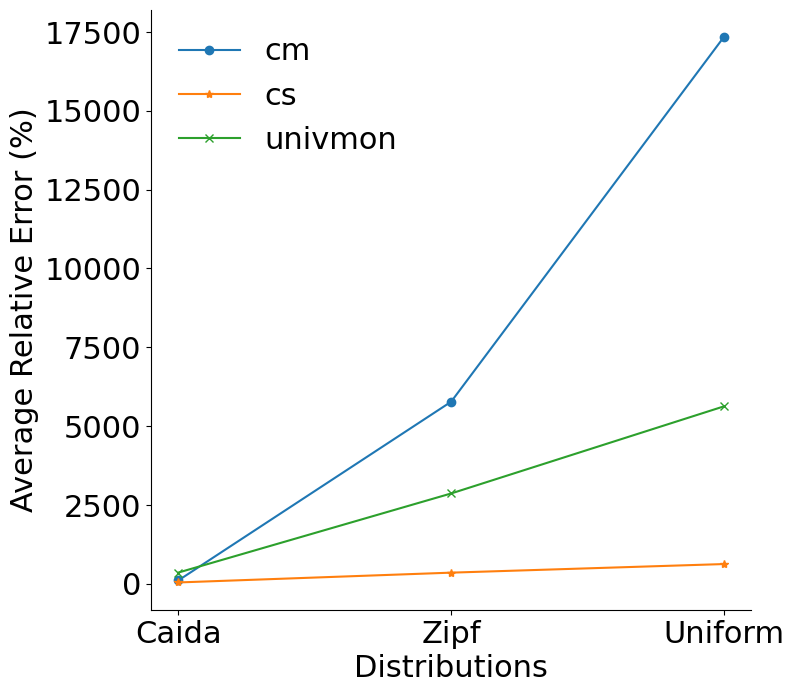

In [12]:
for algos, metric in zip(loop_unit_algos, loop_unit_metric):
    legends = algos
    plot_list, level = create_plot_list(algos, base_dir, directory_list)
    plot_result(plot_list, algos, width, metric, isSaveFig, isShowByte, output_dir_name, legends, x_labels, x_labelname)